In [1]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis
import scipy.stats as stat
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split

C:\Users\harsmoha\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
walmartDf = pd.read_csv('Walmart/train.csv')
walmartDf.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2/5/2010,24924.50,False
1,1,1,2/12/2010,46039.49,True
2,1,1,2/19/2010,41595.55,False
3,1,1,2/26/2010,19403.54,False
4,1,1,3/5/2010,21827.90,False


In [3]:
walmartFDF = pd.read_csv('Walmart/features.csv')
walmartFDF.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2/5/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2/12/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2/19/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2/26/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,3/5/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
walmartFDF.MarkDown1.isnull().sum()

4158

In [5]:
walmartFDF.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [6]:
walmartFDF.CPI.isnull().sum()

585

In [7]:
walmartDF = pd.merge(walmartDf,walmartFDF,on=['Store','Date'], how='inner')
walmartDF.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2/5/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2,2/5/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,3,2/5/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,4,2/5/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,5,2/5/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [8]:
walmartCorr = walmartDF.corr(method='pearson')
walmartCorr

,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
Store,1.000000,0.024004,-0.085195,-0.000548,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552,-0.000548
Dept,0.024004,1.000000,0.148032,0.000916,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837,0.000916
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864,0.012774
IsHoliday_x,-0.000548,0.000916,0.012774,1.000000,-0.155949,-0.078281,-0.035586,0.334818,0.427960,-0.000562,-0.053719,-0.001944,0.010460,1.000000
Temperature,-0.050097,0.004437,-0.002312,-0.155949,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730,-0.155949
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853,-0.078281
MarkDown1,-0.119588,-0.002426,0.085251,-0.035586,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285,-0.035586
MarkDown2,-0.035173,0.000290,0.024130,0.334818,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940,0.334818
MarkDown3,-0.031556,0.001784,0.060385,0.427960,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818,0.427960
MarkDown4,-0.009941,0.004257,0.045414,-0.000562,-0.063947,-0.044986,0.819238,-0.007768,-0.071095,1.000000,0.107792,-0.049628,0.024963,-0.000562


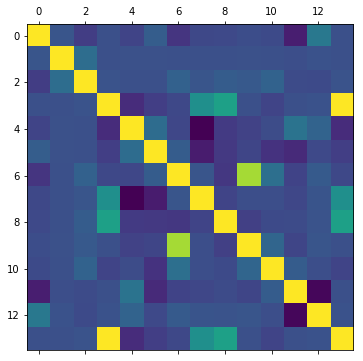

In [9]:
a,b = plt.subplots(figsize=(6,6))
b.matshow(walmartCorr)
#plt.xticks(range(walmartCorr.columns), walmartCorr.columns)
#plt.yticks(range(walmartCorr.columns),walmartCorr.columns)
#plt.plot(walmartDF.corr())

In [10]:
walmartDF.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [11]:
walmartDF.shape

(421570, 15)

In [12]:
walmartDF.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2/5/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2,2/5/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,3,2/5/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,4,2/5/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,5,2/5/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [13]:
salesByStore = walmartDF.groupby('Store')['Weekly_Sales'].apply(lambda x : np.sum(x)) 
salesByStore.head()

Store
1    2.224028e+08
2    2.753824e+08
3    5.758674e+07
4    2.995440e+08
5    4.547569e+07
Name: Weekly_Sales, dtype: float64

In [14]:
salesByStoreDate = walmartDF.groupby(['Store','Date'])['Weekly_Sales'].apply(lambda x : np.sum(x))
salesByStoreDate1 = salesByStoreDate.reset_index()
salesByStoreDate1.head()

,Store,Date,Weekly_Sales
0,1,1/13/2012,1459601.17
1,1,1/14/2011,1391013.96
2,1,1/20/2012,1394393.84
3,1,1/21/2011,1327405.42
4,1,1/27/2012,1319325.59


In [15]:
walmartDF.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [16]:
salesByStoreDept = walmartDF.groupby(['Store','Dept'])['Weekly_Sales'].apply(lambda x : np.sum(x)) 
salesByStoreDept.reset_index().head()

,Store,Dept,Weekly_Sales
0,1,1,3219405.18
1,1,2,6592598.93
2,1,3,1880518.36
3,1,4,5285874.09
4,1,5,3468885.58


In [17]:
salesByStoreDF1 = pd.DataFrame(salesByStore)

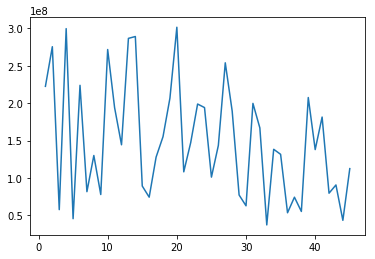

In [18]:
plt.plot(salesByStoreDF1.index, salesByStoreDF1['Weekly_Sales'])
#plt.xticks(range(salesByStoreDF1.index),salesByStoreDF1.index)
plt.show()

In [19]:
salesByStoreDF = pd.DataFrame(salesByStoreDate1)
salesByStoreDF.head()


,Store,Date,Weekly_Sales
0,1,1/13/2012,1459601.17
1,1,1/14/2011,1391013.96
2,1,1/20/2012,1394393.84
3,1,1/21/2011,1327405.42
4,1,1/27/2012,1319325.59


In [20]:
salesByStoreDF[salesByStoreDF.Weekly_Sales == salesByStoreDF.Weekly_Sales.max()]

,Store,Date,Weekly_Sales
1893,14,12/24/2010,3818686.45


In [21]:
walmartDF.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
421565,45,93,10/26/2012,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421566,45,94,10/26/2012,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421567,45,95,10/26/2012,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421568,45,97,10/26/2012,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421569,45,98,10/26/2012,1076.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False


In [22]:
walmartFDF['DateObj'] = walmartFDF['Date'].apply(lambda x : dt.datetime.strptime(x,'%m/%d/%Y') )
walmartFDF.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,DateObj
0,1,2/5/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2010-02-05
1,1,2/12/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,2010-02-12
2,1,2/19/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,2010-02-19
3,1,2/26/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,2010-02-26
4,1,3/5/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,2010-03-05


In [23]:
salesByStoreDateDF = pd.DataFrame(salesByStoreDate1)
salesByStoreDateDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 3 columns):
Store           6435 non-null int64
Date            6435 non-null object
Weekly_Sales    6435 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 150.9+ KB


In [24]:
walmartDFFinal_1 = pd.merge(walmartFDF,salesByStoreDateDF,on=['Store','Date'],how='inner')

In [25]:
walmartDFFinal_1.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,DateObj,Weekly_Sales
0,1,2/5/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2010-02-05,1643690.90
1,1,2/12/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,2010-02-12,1641957.44
2,1,2/19/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,2010-02-19,1611968.17
3,1,2/26/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,2010-02-26,1409727.59
4,1,3/5/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,2010-03-05,1554806.68


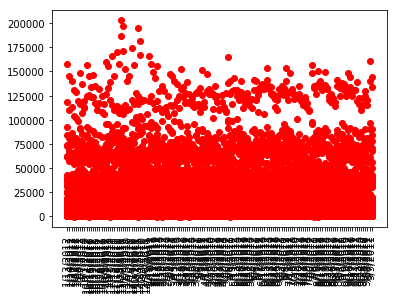

In [26]:
#walmartDF.head()
plt.plot(walmartDF[(walmartDF.Store==1)]['Date'],walmartDF[(walmartDF.Store==1)]['Weekly_Sales'],'ro')
plt.xticks(rotation=90)
plt.show()

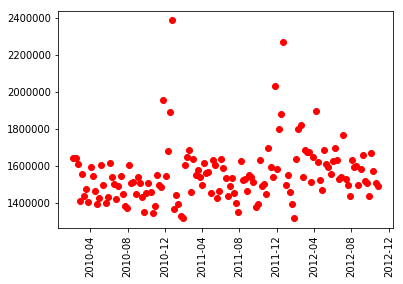

In [27]:
plt.plot(walmartDFFinal_1[walmartDFFinal_1['Store']==1]['DateObj'],walmartDFFinal_1[walmartDFFinal_1['Store']==1]['Weekly_Sales'],'ro')
plt.xticks(rotation=90)
plt.show()

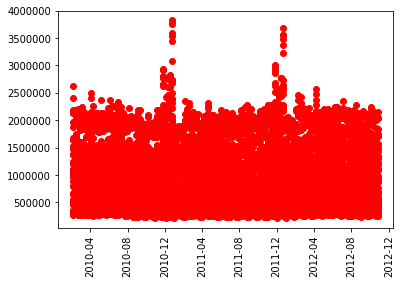

In [28]:
plt.plot(walmartDFFinal_1['DateObj'],walmartDFFinal_1['Weekly_Sales'],'ro')
plt.xticks(rotation=90)
plt.show()

In [29]:
walmartDFFinal_1.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'DateObj', 'Weekly_Sales'],
      dtype='object')

In [30]:
len(walmartDFFinal_1.Unemployment.unique())

349

In [31]:
x = list(range(2)) + list(range(3,5))
print (x)

[0, 1, 3, 4]


In [32]:
walmartDFFinal_1.iloc[1:3:,3:5]

,Fuel_Price,MarkDown1
1,2.548,NaN
2,2.514,NaN


In [33]:
walmartDFFinal_AllStores = walmartDFFinal_1.iloc[:,list(range(2,4)) + list(range(9,14))]
walmartDFFinal_Store = walmartDFFinal_1.iloc[:,list(range(4)) + list(range(9,14))]
walmartDFFinal_AllStores.head()

,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,DateObj,Weekly_Sales
0,42.31,2.572,211.096358,8.106,False,2010-02-05,1643690.90
1,38.51,2.548,211.242170,8.106,True,2010-02-12,1641957.44
2,39.93,2.514,211.289143,8.106,False,2010-02-19,1611968.17
3,46.63,2.561,211.319643,8.106,False,2010-02-26,1409727.59
4,46.50,2.625,211.350143,8.106,False,2010-03-05,1554806.68


In [34]:
walmartDFFinal_AllStores[walmartDFFinal_AllStores.IsHoliday == False]['IsHoliday'].count()

5985

In [35]:

walmartDFFinal_AllStores[walmartDFFinal_AllStores.IsHoliday == True]['IsHoliday'].count()

450

In [36]:
def ConvertHoliday(x):    
    if x == False:        
        returnVal = 0
    else:
        returnVal = 1
    return returnVal


In [37]:
#walmartDFFinal_2.IsHoliday.head()
walmartDFFinal_3 = map(ConvertHoliday,walmartDFFinal_AllStores.IsHoliday)
#walmartDFFinal = walmartDFFinal_2.apply(ConvertHoliday,walmartDFFinal_2.IsHoliday)
falsecount = truecount = 0
for i in walmartDFFinal_3:
    #print (i)
    if i == 0:
        falsecount += 1
    else:
        truecount += 1

print (falsecount, truecount)


5985 450


In [38]:
walmartDFFinal_AllStores = walmartDFFinal_AllStores.replace({True:1,False:0})
#walmartDFFinal12 = pd.DataFrame([walmartDFFinal])
walmartDFFinal_AllStores.head()

,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,DateObj,Weekly_Sales
0,42.31,2.572,211.096358,8.106,0,2010-02-05,1643690.90
1,38.51,2.548,211.242170,8.106,1,2010-02-12,1641957.44
2,39.93,2.514,211.289143,8.106,0,2010-02-19,1611968.17
3,46.63,2.561,211.319643,8.106,0,2010-02-26,1409727.59
4,46.50,2.625,211.350143,8.106,0,2010-03-05,1554806.68


In [39]:
walmartDFFinal_AllStores.DateObj.isnull().sum()

0

In [40]:
len(walmartDFFinal_AllStores.Unemployment.unique())

349

In [41]:
del walmartDFFinal_AllStores['DateObj']

In [42]:
walmartDFFinal_AllStores.describe()

,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly_Sales
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6.435000e+03
mean,60.663782,3.358607,171.578394,7.999151,0.069930,1.046965e+06
std,18.444933,0.459020,39.356712,1.875885,0.255049,5.643666e+05
min,-2.060000,2.472000,126.064000,3.879000,0.000000,2.099863e+05
25%,47.460000,2.933000,131.735000,6.891000,0.000000,5.533501e+05
50%,62.670000,3.445000,182.616521,7.874000,0.000000,9.607460e+05
75%,74.940000,3.735000,212.743293,8.622000,0.000000,1.420159e+06
max,100.140000,4.468000,227.232807,14.313000,1.000000,3.818686e+06


In [43]:
walmartDFFinal_AllStoresTrain,walmartDFFinal_AllStoresTest = train_test_split(walmartDFFinal_AllStores,test_size=0.2,random_state=43)
walmartDFFinal_AllStoresTest.shape

(1287, 6)

In [44]:
#walmartDFTrain.shape[-1]
walmartDF_AllStoresTrain_X = walmartDFFinal_AllStoresTrain.iloc[:,range(walmartDFFinal_AllStoresTrain.shape[-1]-1)]
walmartDF_AllStoresTrain_X.head()

,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
1350,75.93,3.917,128.955300,8.494,0
328,68.71,2.735,215.061402,7.564,1
6340,34.32,3.193,182.598306,8.549,0
3573,51.93,3.969,216.146470,7.293,0
3474,43.43,3.039,204.962100,7.484,1


In [45]:
walmartDF_AllStoresTrain_Y = walmartDFFinal_AllStoresTrain.iloc[:,-1]
walmartDF_AllStoresTrain_Y.head()

1350    2004831.14
328      565567.84
6340     680254.35
3573     685531.85
3474    1115240.61
Name: Weekly_Sales, dtype: float64

In [46]:
walmartDF_AllStoresTest_X = walmartDFFinal_AllStoresTest.iloc[:,range(walmartDFFinal_AllStoresTest.shape[-1]-1)]
walmartDF_AllStoresTest_X.head()

,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
3680,23.89,3.655,137.166677,7.467,1
1023,72.49,2.642,214.472995,6.315,0
3950,73.05,3.842,129.782161,12.890,0
4535,36.86,3.055,196.779665,8.256,0
1307,90.32,3.084,126.126600,9.524,0


In [47]:
walmartDF_AllStoresTest_Y = walmartDFFinal_AllStoresTest.iloc[:,-1]
walmartDF_AllStoresTest_Y.head()

3680    1081005.64
1023     845289.77
3950    1203172.05
4535    1080012.04
1307    1768172.31
Name: Weekly_Sales, dtype: float64

In [48]:
from sklearn import linear_model

In [49]:
reg = linear_model.LinearRegression(normalize=True)

In [50]:
#Calculating model for all stores
model_AllStores = reg.fit(walmartDF_AllStoresTrain_X,walmartDF_AllStoresTrain_Y)

In [51]:
model_AllStores.coef_

array([  -896.75574385, -16120.95660015,  -1596.25989915, -42089.20915971,
        60939.16157659])

In [52]:
walmartTestDF = pd.read_csv('Walmart/test.csv')
walmartTestDF.head()

,Store,Dept,Date,IsHoliday
0,1,1,11/2/2012,False
1,1,1,11/9/2012,False
2,1,1,11/16/2012,False
3,1,1,11/23/2012,True
4,1,1,11/30/2012,False


In [53]:
Yhat_AllStores = model_AllStores.predict(walmartDF_AllStoresTest_X)
Yhat_AllStores

array([ 1208012.84844628,  1044907.68065111,   883512.38126954, ...,
        1284623.20361132,   848458.7726859 ,  1038082.46151116])

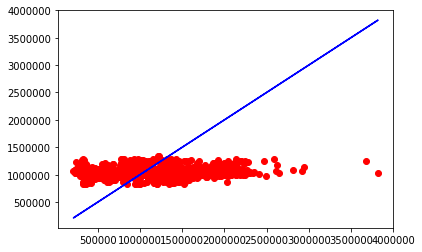

In [54]:
plt.plot(walmartDF_AllStoresTest_Y,Yhat_AllStores,'ro')
plt.plot(walmartDF_AllStoresTest_Y,walmartDF_AllStoresTest_Y,'b-')
plt.show()

In [55]:
#Calculate Error
def calculateError(model,testX,testY):
    yhat = model.predict(testX)
    MPSE = np.mean(abs(yhat-testY)/testY)
    MSSE = np.mean(np.square(yhat-testY))
    return MPSE, MSSE


In [56]:
mpse, msse = calculateError(model_AllStores, walmartDF_AllStoresTest_X, walmartDF_AllStoresTest_Y)
print (mpse, msse)
#Huge error in model, needs regularization

0.6411922961504188 302884181067.5478


In [57]:
predicted = model_AllStores.predict(walmartDF_AllStoresTest_X)

In [58]:
walmartDF_AllStoresTrain_X.describe()

,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
count,5148.000000,5148.000000,5148.000000,5148.000000,5148.000000
mean,60.725019,3.356044,172.017719,8.003473,0.070707
std,18.388594,0.459772,39.345113,1.871764,0.256360
min,5.540000,2.472000,126.064000,3.879000,0.000000
25%,47.597500,2.921000,131.901968,6.901000,0.000000
50%,62.720000,3.439000,183.701613,7.874000,0.000000
75%,75.000000,3.734000,212.963861,8.595000,0.000000
max,100.140000,4.468000,227.232807,14.313000,1.000000


In [59]:
#Using statsmodel api to see p-values of IV and do feature selection.
import statsmodels.api as sm
walmartDF_AllStoresTrain_X2 = sm.add_constant(walmartDF_AllStoresTrain_X)
est = sm.OLS(walmartDF_AllStoresTrain_Y, walmartDF_AllStoresTrain_X2)
est2 = est.fit()
print(est2.summary())
#from this result, it seems Fuel_price should be removed as p-value is greater than most common threshold of 0.05 but need
#check with adjusted R-square before blindly removing it.

C:\Users\harsmoha\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     27.00
Date:                Mon, 06 Aug 2018   Prob (F-statistic):           4.69e-27
Time:                        15:33:59   Log-Likelihood:                -75431.
No. Observations:                5148   AIC:                         1.509e+05
Df Residuals:                    5142   BIC:                         1.509e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.761e+06   8.97e+04     19.635   

In [60]:
walmartDF_AllStoresTrain_X.corr()

,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
Temperature,1.000000,0.145530,0.180218,0.093962,-0.154226
Fuel_Price,0.145530,1.000000,-0.170775,-0.032216,-0.082094
CPI,0.180218,-0.170775,1.000000,-0.308885,0.001530
Unemployment,0.093962,-0.032216,-0.308885,1.000000,0.006361
IsHoliday,-0.154226,-0.082094,0.001530,0.006361,1.000000


In [61]:
from sklearn import metrics
print (metrics.r2_score(walmartDF_AllStoresTest_Y, predicted))

0.024103260308


In [62]:
#print (metrics.accuracy_score(walmartDF_AllStoresTest_Y, predicted))

In [63]:
walmartDF_AllStoresTrain_X.columns

Index(['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday'], dtype='object')

In [64]:
#Attempting Lasso regularization
lasso = linear_model.Lasso(alpha=0.5, max_iter=1000)

In [65]:
#walmartDF_AllStoresTrain_X.shape
model_AllStores_Lasso = lasso.fit(walmartDF_AllStoresTrain_X,walmartDF_AllStoresTrain_Y)
Yhat_AllStores_Lasso = model_AllStores_Lasso.predict(walmartDF_AllStoresTest_X)
Yhat_AllStores_Lasso

array([ 1208007.0707217 ,  1044906.17838728,   883514.54634235, ...,
        1284623.97900977,   848462.05058468,  1038084.29513368])

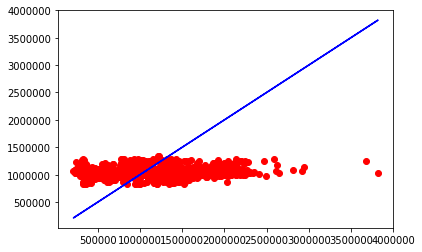

In [66]:
plt.plot(walmartDF_AllStoresTest_Y,Yhat_AllStores_Lasso,'ro')
plt.plot(walmartDF_AllStoresTest_Y,walmartDF_AllStoresTest_Y,'b-')
plt.show()

In [67]:
mpse, msse = calculateError(model_AllStores_Lasso, walmartDF_AllStoresTest_X, walmartDF_AllStoresTest_Y)
print (mpse, msse)

0.641192228541253 302884217015.5822


In [68]:
#Still huge error, perform cross-tabulation
Store_dummies = pd.get_dummies(walmartDFFinal_Store.Store,prefix='Store').iloc[:,1:]
walmartDFFinal_AllStoresCross = pd.concat([walmartDFFinal_Store,Store_dummies],axis=1)
walmartDFFinal_AllStoresCross.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,DateObj,Weekly_Sales,Store_2,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1,2/5/2010,42.31,2.572,211.096358,8.106,False,2010-02-05,1643690.90,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2/12/2010,38.51,2.548,211.242170,8.106,True,2010-02-12,1641957.44,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2/19/2010,39.93,2.514,211.289143,8.106,False,2010-02-19,1611968.17,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2/26/2010,46.63,2.561,211.319643,8.106,False,2010-02-26,1409727.59,0,...,0,0,0,0,0,0,0,0,0,0
4,1,3/5/2010,46.50,2.625,211.350143,8.106,False,2010-03-05,1554806.68,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
walmartDFFinal_AllStoresCross_1 = walmartDFFinal_AllStoresCross.replace({True:1,False:0})
walmartDFFinal_AllStoresCross_1.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,DateObj,Weekly_Sales,Store_2,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1,2/5/2010,42.31,2.572,211.096358,8.106,0,2010-02-05,1643690.90,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2/12/2010,38.51,2.548,211.242170,8.106,1,2010-02-12,1641957.44,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2/19/2010,39.93,2.514,211.289143,8.106,0,2010-02-19,1611968.17,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2/26/2010,46.63,2.561,211.319643,8.106,0,2010-02-26,1409727.59,0,...,0,0,0,0,0,0,0,0,0,0
4,1,3/5/2010,46.50,2.625,211.350143,8.106,0,2010-03-05,1554806.68,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
walmartDFFinal_AllStoresCross_Train, walmartDFFinal_AllStoresCross_Test = train_test_split(
    walmartDFFinal_AllStoresCross_1,test_size=0.3,random_state=42)

In [71]:
walmartDFFinal_AllStoresCross_Test.shape

(1931, 53)

In [72]:
wmDFFinal_AllStoresCross_Train_X = walmartDFFinal_AllStoresCross_Train.iloc[:,list(range(2,7)) + list(range(9,walmartDFFinal_AllStoresCross_Train.shape[1]))]
wmDFFinal_AllStoresCross_Train_X.head()

,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Store_2,Store_3,Store_4,Store_5,Store_6,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
1288,49.96,2.828,126.496258,9.765,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1115,65.19,3.891,225.062571,5.679,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
582,65.30,2.808,211.038853,6.465,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3647,56.94,3.851,135.265267,7.818,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1564,86.49,3.638,225.829306,6.334,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
wmDFFinal_AllStoresCross_Train_Y = walmartDFFinal_AllStoresCross_Train.Weekly_Sales
wmDFFinal_AllStoresCross_Train_Y.head()

1288    2176028.52
1115     909989.45
582      306858.69
3647     997474.93
1564    1372872.35
Name: Weekly_Sales, dtype: float64

In [74]:
wmDFFinal_AllStoresCross_Test_X = walmartDFFinal_AllStoresCross_Test.iloc[:,list(range(2,7)) + list(range(9,walmartDFFinal_AllStoresCross_Test.shape[1]))]
wmDFFinal_AllStoresCross_Test_X.head()

,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Store_2,Store_3,Store_4,Store_5,Store_6,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
2436,42.39,2.805,131.784000,9.202,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3361,68.88,3.964,135.265267,8.212,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
233,65.87,3.372,217.325182,7.441,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3667,40.08,3.570,136.461806,7.598,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5011,59.56,2.701,209.980321,8.554,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [75]:
wmDFFinal_AllStoresCross_Test_Y = walmartDFFinal_AllStoresCross_Test.Weekly_Sales
wmDFFinal_AllStoresCross_Test_Y.head()

2436    1138800.32
3361    1304850.67
233     1769296.25
3667    1077640.13
5011     428851.99
Name: Weekly_Sales, dtype: float64

In [76]:
wmDFFinal_AllStoresCross_Train_X.shape

(4504, 49)

In [77]:
#Attempting backward elimination approach for getting accuracy
alpha = 0.05
#df = pd.DataFrame(np.ones(4504,)).join(wmDFFinal_AllStoresCross_Train_X,how='outer')
df = wmDFFinal_AllStoresCross_Train_X
df['Ones'] = np.ones(wmDFFinal_AllStoresCross_Train_X.shape[0],)
dfcolumns = df.columns.values

C:\Users\harsmoha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [78]:
dfcolumns = list(dfcolumns[(dfcolumns.shape[0])-1:(dfcolumns.shape[0])]) + list(dfcolumns[:(dfcolumns.shape[0])-1])
dfcolumns

['Ones',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment',
 'IsHoliday',
 'Store_2',
 'Store_3',
 'Store_4',
 'Store_5',
 'Store_6',
 'Store_7',
 'Store_8',
 'Store_9',
 'Store_10',
 'Store_11',
 'Store_12',
 'Store_13',
 'Store_14',
 'Store_15',
 'Store_16',
 'Store_17',
 'Store_18',
 'Store_19',
 'Store_20',
 'Store_21',
 'Store_22',
 'Store_23',
 'Store_24',
 'Store_25',
 'Store_26',
 'Store_27',
 'Store_28',
 'Store_29',
 'Store_30',
 'Store_31',
 'Store_32',
 'Store_33',
 'Store_34',
 'Store_35',
 'Store_36',
 'Store_37',
 'Store_38',
 'Store_39',
 'Store_40',
 'Store_41',
 'Store_42',
 'Store_43',
 'Store_44',
 'Store_45']

In [79]:
wmdf = df[dfcolumns]
wmdf.shape

(4504, 50)

In [80]:
from statsmodels.formula.api import OLS

model_ols = OLS(endog=wmDFFinal_AllStoresCross_Train_Y, exog=wmdf).fit()

In [81]:
model_ols = OLS(endog=wmDFFinal_AllStoresCross_Train_Y, exog=wmdf).fit()
model_ols.summary()
#keep removing feature with highest p>alpha till all features are having p<alpha.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     1064.
Date:                Mon, 06 Aug 2018   Prob (F-statistic):               0.00
Time:                        15:34:00   Log-Likelihood:                -60309.
No. Observations:                4504   AIC:                         1.207e+05
Df Residuals:                    4454   BIC:                         1.210e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Ones          1.274e+06   2.71e+05      4.697      0.000    7.42e+05    1.81e+06
Temperature   -773.0965    156.839     -4.929      0.000   -1080.578    -465.615
Fuel_Price   -4.019e+04   8438.826     -4.763      0.000   -5.67e+04   -2.36e+04
CPI           2855.1881   1226.896      2.327      0.020     449.862    5260.515
Unemployment -2.088e+04   5109.906     -4.086      0.000   -3.09e+04   -1.09e+04
IsHoliday     7.576e+04   9565.645      7.920      0.000     5.7e+04    9.45e+04
Store_2       3.736e+05    2.3e+04     16.264      0.000    3.29e+05    4.19e+05
Store_3      -1.163e+06   2.35e+04    -49.408      0.000   -1.21e+06   -1.12e+06
Store_4       7.474e+05   1.14e+05      6.569      0.000    5.24e+05     9.7e+05
Store_5      -1.263e+06   2.36e+04    -53.616      0.000   -1.31e+06   -1.22e+06
Store_6      -1.023e+04   2.34e+04     -0.437      0.662   -5.61e+04    3.57e+04
Store_7      -9.235e+05   3.43e+04    -26.911      0.000   -9.91e+05   -8.56e+05
Store_8      -6.953e+05   2.43e+04    -28.557      0.000   -7.43e+05   -6.48e+05
Store_9      -1.052e+06   2.42e+04    -43.530      0.000    -1.1e+06      -1e+06
Store_10       6.32e+05    1.1e+05      5.754      0.000    4.17e+05    8.47e+05
Store_11     -2.024e+05   2.33e+04     -8.682      0.000   -2.48e+05   -1.57e+05
Store_12     -1.659e+05   1.03e+05     -1.612      0.107   -3.68e+05    3.59e+04
Store_13      6.928e+05   1.11e+05      6.216      0.000    4.74e+05    9.11e+05
Store_14       5.47e+05   4.22e+04     12.974      0.000    4.64e+05     6.3e+05
Store_15     -6.839e+05   1.03e+05     -6.633      0.000   -8.86e+05   -4.82e+05
Store_16      -1.02e+06   3.82e+04    -26.683      0.000   -1.09e+06   -9.45e+05
Store_17     -4.421e+05   1.13e+05     -3.930      0.000   -6.63e+05   -2.22e+05
Store_18     -2.107e+05   1.01e+05     -2.096      0.036   -4.08e+05   -1.36e+04
Store_19      1.389e+05   1.03e+05      1.348      0.178   -6.31e+04    3.41e+05
Store_20      5.772e+05   2.52e+04     22.903      0.000    5.28e+05    6.27e+05
Store_21     -7.892e+05   2.31e+04    -34.095      0.000   -8.35e+05   -7.44e+05
Store_22     -3.081e+05   9.75e+04     -3.160      0.002   -4.99e+05   -1.17e+05
Store_23      8482.4948    1.1e+05      0.077      0.939   -2.07e+05    2.24e+05
Store_24      6.403e+04   1.02e+05      0.627      0.531   -1.36e+05    2.64e+05
Store_25     -8.362e+05   2.56e+04    -32.712      0.000   -8.86e+05   -7.86e+05
Store_26     -3.263e+05   1.03e+05     -3.181      0.001   -5.27e+05   -1.25e+05
Store_27      4.772e+05   9.82e+04      4.858      0.000    2.85e+05     6.7e+05
Store_28       1.36e+05   1.03e+05      1.323      0.186   -6.56e+04    3.37e+05
Store_29     -7.461e+05   9.87e+04     -7.557      0.000    -9.4e+05   -5.53e+05
Store_30     -1.115e+06   2.26e+04    -49.321      0.000   -1.16e+06   -1.07e+06
Store

In [82]:
del wmDFFinal_AllStoresCross_Train_X['Ones']
wmDFFinal_AllStoresCross_Train_X.head()

,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Store_2,Store_3,Store_4,Store_5,Store_6,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
1288,49.96,2.828,126.496258,9.765,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1115,65.19,3.891,225.062571,5.679,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
582,65.30,2.808,211.038853,6.465,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3647,56.94,3.851,135.265267,7.818,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1564,86.49,3.638,225.829306,6.334,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
#First performing regression without Lasso
model_AllStores_Cross = reg.fit(wmDFFinal_AllStoresCross_Train_X,wmDFFinal_AllStoresCross_Train_Y)

In [84]:
Yhat_AllStores_Cross = model_AllStores_Cross.predict(wmDFFinal_AllStoresCross_Test_X)

In [85]:
model_AllStores_Cross.score(wmDFFinal_AllStoresCross_Train_X,wmDFFinal_AllStoresCross_Train_Y)

0.92131012204099949

In [86]:
#find error
mape, msse = calculateError(model_AllStores_Cross,wmDFFinal_AllStoresCross_Test_X,wmDFFinal_AllStoresCross_Test_Y)
print (mape, msse)

0.08877633490387815 26700105162.544968


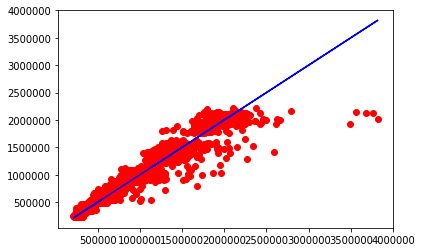

In [87]:
plt.plot(wmDFFinal_AllStoresCross_Test_Y, Yhat_AllStores_Cross,'ro')
plt.plot(wmDFFinal_AllStoresCross_Test_Y,wmDFFinal_AllStoresCross_Test_Y,'b-')
plt.show()

In [88]:
reg.coef_

array([ -7.73096490e+02,  -4.01915820e+04,   2.85518808e+03,
        -2.08772049e+04,   7.57574819e+04,   3.73583687e+05,
        -1.16312730e+06,   7.47391112e+05,  -1.26335075e+06,
        -1.02302058e+04,  -9.23505872e+05,  -6.95254265e+05,
        -1.05196880e+06,   6.31977218e+05,  -2.02359007e+05,
        -1.65935152e+05,   6.92773587e+05,   5.46969031e+05,
        -6.83862842e+05,  -1.01985454e+06,  -4.42124945e+05,
        -2.10743670e+05,   1.38888564e+05,   5.77204437e+05,
        -7.89245009e+05,  -3.08092769e+05,   8.48249475e+03,
         6.40263442e+04,  -8.36199459e+05,  -3.26276863e+05,
         4.77156510e+05,   1.35956950e+05,  -7.46128622e+05,
        -1.11470512e+06,  -1.60325971e+05,  -3.23041401e+05,
        -1.01048617e+06,  -3.01472276e+05,  -4.00494268e+05,
        -1.16737714e+06,  -1.02122664e+06,  -7.91350296e+05,
        -9.65157844e+04,  -4.23532149e+05,  -2.58985156e+05,
        -7.15915751e+05,  -8.47574195e+05,  -1.02825942e+06,
        -6.71449543e+05]

In [89]:
#Performing regression with lasso
lasso = linear_model.Lasso(alpha=1,max_iter=1000)
model_AllStores_Cross_Lasso = lasso.fit(wmDFFinal_AllStoresCross_Train_X,wmDFFinal_AllStoresCross_Train_Y)
model_AllStores_Cross_Lasso.coef_

C:\Users\harsmoha\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


array([ -7.72316333e+02,  -4.22558745e+04,   3.32933165e+03,
        -2.00665435e+04,   7.55208275e+04,   3.75355313e+05,
        -1.16269344e+06,   7.91787997e+05,  -1.26083658e+06,
        -8.46472237e+03,  -9.11950390e+05,  -6.93968005e+05,
        -1.05090990e+06,   6.75068276e+05,  -2.01879417e+05,
        -1.26375390e+05,   7.36481912e+05,   5.62138746e+05,
        -6.43281799e+05,  -1.00656846e+06,  -3.97984866e+05,
        -1.71190567e+05,   1.79289127e+05,   5.82843236e+05,
        -7.87320102e+05,  -2.69747922e+05,   5.11775192e+04,
         1.04051948e+05,  -8.30401190e+05,  -2.85947632e+05,
         5.15687345e+05,   1.75288369e+05,  -7.07367843e+05,
        -1.11283426e+06,  -1.58553232e+05,  -3.11515196e+05,
        -9.67341871e+05,  -2.60279969e+05,  -3.62777816e+05,
        -1.16531099e+06,  -1.01912946e+06,  -7.51925821e+05,
        -9.44791043e+04,  -3.80727343e+05,  -2.46104814e+05,
        -6.72674804e+05,  -8.43944628e+05,  -9.84259038e+05,
        -6.56043977e+05]

In [90]:
Yhat_AllStores_Cross_Lasso = model_AllStores_Cross_Lasso.predict(wmDFFinal_AllStoresCross_Test_X)

In [91]:
#find error
mape, msse = calculateError(model_AllStores_Cross_Lasso,wmDFFinal_AllStoresCross_Test_X,wmDFFinal_AllStoresCross_Test_Y)
print (mape, msse)
#Lasso needs to be tuned as accuracy has gone down

0.08891511928031627 26700254331.967293


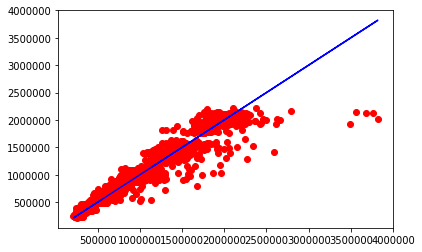

In [92]:
plt.plot(wmDFFinal_AllStoresCross_Test_Y, Yhat_AllStores_Cross_Lasso,'ro')
plt.plot(wmDFFinal_AllStoresCross_Test_Y,wmDFFinal_AllStoresCross_Test_Y,'b-')
plt.show()

In [93]:
#Finding out out best value of alpha
modelErrors = np.empty(20)
for i, alpha1 in enumerate(np.linspace(1,20,20)):
    lasso1 = linear_model.Lasso(alpha=alpha1, max_iter=1000)
    model1 = lasso1.fit(wmDFFinal_AllStoresCross_Train_X,wmDFFinal_AllStoresCross_Train_Y)
    mape, msse = calculateError(model1, wmDFFinal_AllStoresCross_Test_X,wmDFFinal_AllStoresCross_Test_Y)
    #modelErrors[i] = 1-mape
    modelErrors[i] = msse

C:\Users\harsmoha\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [94]:
#print (modelErrors*100)
print (modelErrors)

[  2.67002543e+10   2.67003276e+10   2.67005633e+10   2.67009614e+10
   2.67015220e+10   2.67022450e+10   2.67031304e+10   2.67041782e+10
   2.67053876e+10   2.67060366e+10   2.67067947e+10   2.67082407e+10
   2.67098934e+10   2.67111802e+10   2.67117632e+10   2.67123761e+10
   2.67130220e+10   2.67140876e+10   2.67155343e+10   2.67171265e+10]


In [95]:
from sklearn.metrics import mean_squared_error

In [96]:
modelErrors = np.empty(50)
i=0
for alpha1 in (np.linspace(0.1,20,50)):
    lasso1 = linear_model.Lasso(alpha=alpha1)
    model1 = lasso1.fit(wmDFFinal_AllStoresCross_Train_X,wmDFFinal_AllStoresCross_Train_Y)    
    modelErrors[i] = mean_squared_error(wmDFFinal_AllStoresCross_Test_Y,model1.predict(wmDFFinal_AllStoresCross_Test_X))
    i += 1
      

C:\Users\harsmoha\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [97]:
print (modelErrors)

[  2.67003273e+10   2.67002781e+10   2.67002557e+10   2.67002600e+10
   2.67002912e+10   2.67003491e+10   2.67004339e+10   2.67005454e+10
   2.67006838e+10   2.67008489e+10   2.67010408e+10   2.67012595e+10
   2.67015050e+10   2.67017773e+10   2.67020764e+10   2.67024022e+10
   2.67027549e+10   2.67031343e+10   2.67035405e+10   2.67039735e+10
   2.67044333e+10   2.67049198e+10   2.67054310e+10   2.67056707e+10
   2.67059323e+10   2.67062158e+10   2.67065214e+10   2.67068489e+10
   2.67074290e+10   2.67080489e+10   2.67086940e+10   2.67093644e+10
   2.67100599e+10   2.67108652e+10   2.67111269e+10   2.67113615e+10
   2.67115977e+10   2.67118389e+10   2.67120855e+10   2.67123376e+10
   2.67125951e+10   2.67128581e+10   2.67131265e+10   2.67135193e+10
   2.67140462e+10   2.67146110e+10   2.67152046e+10   2.67158232e+10
   2.67164643e+10   2.67171265e+10]


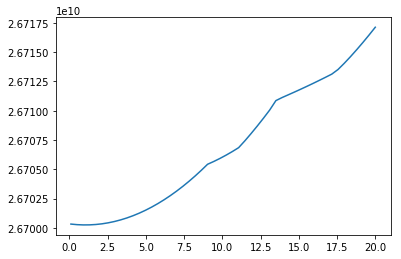

In [98]:
plt.plot(np.linspace(0.1,20,50), modelErrors)
plt.show()

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [100]:
scalar = StandardScaler()

In [101]:
wmDFFinal_AllStoresCross_Train_X.columns

Index(['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday',
       'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7',
       'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13',
       'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19',
       'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25',
       'Store_26', 'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31',
       'Store_32', 'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37',
       'Store_38', 'Store_39', 'Store_40', 'Store_41', 'Store_42', 'Store_43',
       'Store_44', 'Store_45'],
      dtype='object')

In [102]:
X = scalar.fit_transform(wmDFFinal_AllStoresCross_Train_X)
X.shape

(4504, 49)

In [103]:
poly = PolynomialFeatures(2)
poly_trans = poly.fit_transform(X)

In [104]:
poly.fit(poly_trans, wmDFFinal_AllStoresCross_Train_Y)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [105]:
polymodel = linear_model.LinearRegression()
polymodel.fit(poly_trans,wmDFFinal_AllStoresCross_Train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [106]:
X_test = scalar.transform(wmDFFinal_AllStoresCross_Test_X)
X_test.shape

(1931, 49)

In [107]:
poly_test = PolynomialFeatures(2)
poly_trans_test = poly_test.fit_transform(X_test)

In [108]:
mape, msse = calculateError(polymodel, poly_trans_test,wmDFFinal_AllStoresCross_Test_Y)
print (mape, msse)

0.0802771507900659 25018699326.044544


In [109]:
wmDFFinal_AllStoresCross_Test_Y.shape

(1931,)

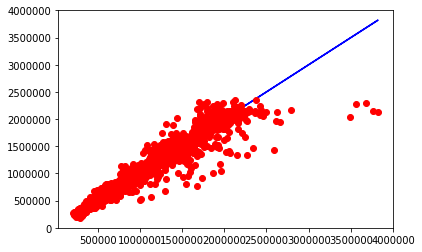

In [110]:
plt.plot(wmDFFinal_AllStoresCross_Test_Y, wmDFFinal_AllStoresCross_Test_Y,'b-')
plt.plot(wmDFFinal_AllStoresCross_Test_Y, polymodel.predict(poly_trans_test),'ro')
plt.figure(figsize=(8,8))
plt.show()

In [111]:
#Using SVR
from sklearn.svm import SVR

In [112]:
svr = SVR()
svrmodel = svr.fit(X,wmDFFinal_AllStoresCross_Train_Y)

In [113]:
mape, msse = calculateError(svrmodel, X_test, wmDFFinal_AllStoresCross_Test_Y)
print (mape, msse)
#Poor prediction as Y was not scaled. Scaling doesnt happen in SVR automatically unlike in Linear/Polynomial Regression

0.61009494618295 330779422395.87054


In [114]:
scalar1 = StandardScaler()

In [115]:
Y = scalar1.fit_transform(wmDFFinal_AllStoresCross_Train_Y.reshape(-1,1))

C:\Users\harsmoha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [116]:
Y_test = scalar1.transform(wmDFFinal_AllStoresCross_Test_Y.reshape(-1,1))

C:\Users\harsmoha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [117]:
svr1 = SVR()
svrmodel1 = svr1.fit(X,Y)

C:\Users\harsmoha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [118]:
mape, msse = calculateError(svrmodel1, X_test, Y_test)
print (mape, msse)
#Still poor prediction

0.360522321767 1.88241371855


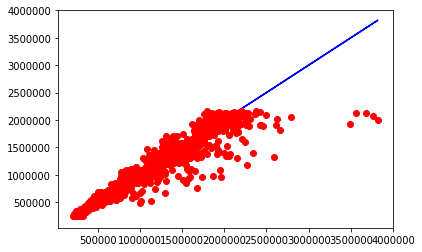

In [119]:
plt.plot(wmDFFinal_AllStoresCross_Test_Y, wmDFFinal_AllStoresCross_Test_Y,'b-')
plt.plot(wmDFFinal_AllStoresCross_Test_Y, scalar1.inverse_transform(svrmodel1.predict(X_test)),'ro')
plt.figure(figsize=(8,8))
plt.show()

In [120]:
#Using Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

In [121]:
dtree = DecisionTreeRegressor(random_state=10)

In [122]:
#First checking without scaling
dtree.fit(wmDFFinal_AllStoresCross_Train_X,wmDFFinal_AllStoresCross_Train_Y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=10, splitter='best')

In [123]:
mape, msse = calculateError(dtree, wmDFFinal_AllStoresCross_Test_X, wmDFFinal_AllStoresCross_Test_Y)
print (mape, msse)

0.08759848477720462 39483788087.851494


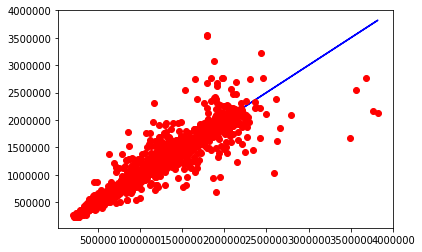

In [124]:
plt.plot(wmDFFinal_AllStoresCross_Test_Y, wmDFFinal_AllStoresCross_Test_Y,'b-')
plt.plot(wmDFFinal_AllStoresCross_Test_Y, dtree.predict(wmDFFinal_AllStoresCross_Test_X),'ro')
plt.figure(figsize=(8,8))
plt.show()

In [125]:
#Using scaling in DTR

In [126]:
dtree1 = DecisionTreeRegressor(random_state=10)

In [127]:
dtree1.fit(X,wmDFFinal_AllStoresCross_Train_Y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=10, splitter='best')

In [128]:
mape, msse = calculateError(dtree1, X_test, wmDFFinal_AllStoresCross_Test_Y)
print (mape, msse)
#Error decreased after scaling

0.08740393395636092 39300947111.34267


In [129]:
#Using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [130]:
#trying without scaling first
rf = RandomForestRegressor(n_estimators=500,random_state=10)

In [131]:
rf.fit(wmDFFinal_AllStoresCross_Train_X,wmDFFinal_AllStoresCross_Train_Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [132]:
mape, msse = calculateError(rf, wmDFFinal_AllStoresCross_Test_X, wmDFFinal_AllStoresCross_Test_Y)
print (mape, msse)
#Accuracy increased compared to Polynomial and DTR

0.06851775675516494 21977327732.52188


In [133]:
#trying with scaling
rf1 = RandomForestRegressor(n_estimators=500,random_state=10)
rf1.fit(X,wmDFFinal_AllStoresCross_Train_Y)
mape, msse = calculateError(rf1, X_test, wmDFFinal_AllStoresCross_Test_Y)
print (mape, msse)
#Accuracy increased after scaling

0.0684362970243342 21990456884.720547


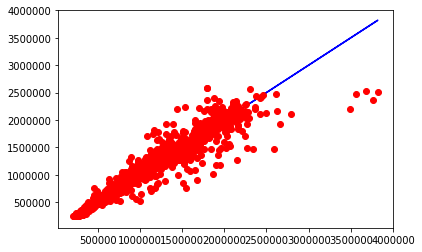

In [134]:
plt.plot(wmDFFinal_AllStoresCross_Test_Y, wmDFFinal_AllStoresCross_Test_Y,'b-')
plt.plot(wmDFFinal_AllStoresCross_Test_Y, rf1.predict(X_test),'ro')
plt.figure(figsize=(8,8))
plt.show()

In [135]:
#trying with scaling in Y also
rf2 = RandomForestRegressor(n_estimators=500,random_state=10)
rf2.fit(X,Y)
mape, msse = calculateError(rf2, X_test, Y_test)
print (mape, msse)
#Accuracy came down drastically with scaling in Y. Not recommended

C:\Users\harsmoha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.358947446519 1.97631521847


In [136]:
#Using k-fold cross validation to better understand model performance
from sklearn.model_selection import cross_val_score

In [137]:
accuracies = cross_val_score(estimator=rf,X=wmDFFinal_AllStoresCross_Train_X, y=wmDFFinal_AllStoresCross_Train_Y,cv=10)
accuracies

array([ 0.92714088,  0.93609972,  0.93232885,  0.92278349,  0.93754619,
        0.92534667,  0.90956009,  0.9370573 ,  0.93409641,  0.93014   ])

In [138]:
accuracies.mean()

0.92920995898915992

In [139]:
#Using GridSearchCV for tuning the model with best parameters
from sklearn.model_selection import GridSearchCV

In [140]:
rf3 = RandomForestRegressor(n_estimators=100,random_state=10)
#rf3.fit(X,wmDFFinal_AllStoresCross_Train_Y)
params = [{'n_estimators':[300,400], 'min_samples_split':[2,3], 'min_samples_leaf':[1,2]}          
         ]

In [141]:
grid_search = GridSearchCV(estimator=rf3,param_grid=params,cv=10,n_jobs=-1)

In [142]:
grid_search = grid_search.fit(X,wmDFFinal_AllStoresCross_Train_Y)

In [143]:
grid_search.best_params_

{'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}

In [144]:
grid_search.best_score_

0.93060340994235624

In [145]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,-0.567131,-1.165268,-1.151924,0.938433,3.684569,-0.149915,-0.145997,-0.146788,-0.153741,-0.149915,...,-0.149915,-0.151456,-0.151456,-0.153741,-0.152983,-0.151456,-0.146788,-0.155996,-0.152983,-0.155996
1,0.259173,1.157092,1.361419,-1.238631,-0.271402,-0.149915,-0.145997,-0.146788,-0.153741,-0.149915,...,-0.149915,-0.151456,-0.151456,-0.153741,-0.152983,-0.151456,-0.146788,-0.155996,-0.152983,-0.155996
2,0.265141,-1.208963,1.003828,-0.819842,-0.271402,-0.149915,-0.145997,-0.146788,6.504436,-0.149915,...,-0.149915,-0.151456,-0.151456,-0.153741,-0.152983,-0.151456,-0.146788,-0.155996,-0.152983,-0.155996
3,-0.188431,1.069703,-0.928323,-0.098949,-0.271402,-0.149915,-0.145997,-0.146788,-0.153741,-0.149915,...,-0.149915,-0.151456,-0.151456,-0.153741,-0.152983,-0.151456,-0.146788,-0.155996,-0.152983,-0.155996
4,1.414805,0.604357,1.380970,-0.889640,-0.271402,-0.149915,-0.145997,-0.146788,-0.153741,-0.149915,...,-0.149915,-0.151456,-0.151456,-0.153741,-0.152983,-0.151456,-0.146788,-0.155996,-0.152983,-0.155996


In [146]:
#Attempting Gradient Descent without regularization

In [147]:
Y_gradient = np.array([wmDFFinal_AllStoresCross_Train_Y]).transpose()
Y_gradient.shape

(4504, 1)

In [148]:
Y_gradient.transpose().shape

(1, 4504)

In [149]:
X

array([[-0.56713142, -1.16526825, -1.15192411, ..., -0.15599607,
        -0.15298291, -0.15599607],
       [ 0.25917269,  1.15709203,  1.36141881, ..., -0.15599607,
        -0.15298291, -0.15599607],
       [ 0.26514074, -1.2089627 ,  1.00382794, ..., -0.15599607,
        -0.15298291, -0.15599607],
       ..., 
       [ 1.42674094,  0.70485442,  1.08691494, ..., -0.15599607,
        -0.15298291, -0.15599607],
       [-0.85576818,  0.1455654 , -1.06077093, ..., -0.15599607,
        -0.15298291, -0.15599607],
       [-1.7976355 , -1.77262117,  0.45547813, ..., -0.15599607,
        -0.15298291, -0.15599607]])

In [150]:
X_gradient1 = np.ones(X.shape[0])
X_gradient2 = np.c_[X_gradient1,X]
X_gradient2

array([[ 1.        , -0.56713142, -1.16526825, ..., -0.15599607,
        -0.15298291, -0.15599607],
       [ 1.        ,  0.25917269,  1.15709203, ..., -0.15599607,
        -0.15298291, -0.15599607],
       [ 1.        ,  0.26514074, -1.2089627 , ..., -0.15599607,
        -0.15298291, -0.15599607],
       ..., 
       [ 1.        ,  1.42674094,  0.70485442, ..., -0.15599607,
        -0.15298291, -0.15599607],
       [ 1.        , -0.85576818,  0.1455654 , ..., -0.15599607,
        -0.15298291, -0.15599607],
       [ 1.        , -1.7976355 , -1.77262117, ..., -0.15599607,
        -0.15298291, -0.15599607]])

In [151]:
X_gradient = X_gradient2.transpose
X_gradient().shape

(50, 4504)

In [152]:
thetanew = np.random.randint(0,50,size=(X_gradient().shape[0],1))
thetanew.shape

(50, 1)

In [153]:
X_gradient().shape

(50, 4504)

In [154]:
"""theta = thetanew
thetaTX = np.dot(theta.transpose(),X_gradient())
diff = np.subtract(thetaTX,Y_gradient.transpose())    
derivative = np.dot(diff,X_gradient().transpose())
theta = np.subtract(thetanew, np.multiply((alpha/X_gradient().shape[1]),derivative.transpose()))
thetaTXNew = np.dot(theta.transpose(),X_gradient())
costerror = np.subtract(thetaTXNew,Y_gradient.transpose())
print (costerror.sum())
#thetaTXNew.shape
"""

'theta = thetanew\nthetaTX = np.dot(theta.transpose(),X_gradient())\ndiff = np.subtract(thetaTX,Y_gradient.transpose())    \nderivative = np.dot(diff,X_gradient().transpose())\ntheta = np.subtract(thetanew, np.multiply((alpha/X_gradient().shape[1]),derivative.transpose()))\nthetaTXNew = np.dot(theta.transpose(),X_gradient())\ncosterror = np.subtract(thetaTXNew,Y_gradient.transpose())\nprint (costerror.sum())\n#thetaTXNew.shape\n'

In [214]:
iteration = 1000

In [267]:
thetanew = np.random.randint(0,50,size=(X_gradient().shape[0],1))
theta = thetanew
errorLog = np.empty(iteration)
alpha = 0.85
for i in range(iteration):
    thetaTX = np.dot(theta.transpose(),X_gradient())
    diff = np.subtract(thetaTX,Y_gradient.transpose())    
    derivative = np.dot(diff,X_gradient().transpose())
    theta = np.subtract(thetanew, np.multiply((alpha/X_gradient().shape[1]),derivative.transpose()))
    thetaTXNew = np.dot(theta.transpose(),X_gradient())
    costerror = np.multiply(np.divide(1,np.multiply(2,X_gradient().shape[0])), 
                            np.square(np.subtract(thetaTXNew,Y_gradient.transpose())))
    #print (costerror.sum())
    errorLog[i] = costerror.sum()
    #Checking convergence
    #if(i>0 and (errorLog[i-1] - errorLog[i])<0.0001):
     #   break
    thetanew = theta

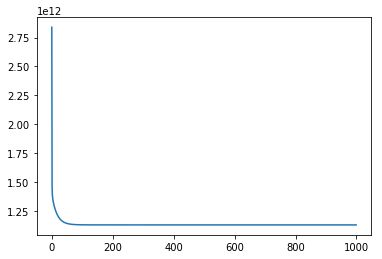

In [268]:
plt.plot(range(iteration),errorLog)
plt.show()

In [230]:
errorLog[iteration-2] - errorLog[iteration-1]

95583.98193359375

In [231]:
def calculateErrorGradientDescent(theta,testX,testY):
    yhat = np.dot(theta.transpose(),testX())
    MPSE = np.mean(np.divide(np.subtract(yhat,testY.transpose()),testY.transpose()))
    return MPSE

In [232]:
Y_test_gradient = np.array([wmDFFinal_AllStoresCross_Test_Y]).transpose()
Y_test_gradient.shape

(1931, 1)

In [233]:
Y_test_gradient.transpose().shape

(1, 1931)

In [234]:
X_test_gradient1 = np.ones(X_test.shape[0])
X_test_gradient2 = np.c_[X_test_gradient1,X_test]
X_test_gradient2

array([[ 1.        , -0.977842  , -1.21551687, ..., -0.15599607,
        -0.15298291, -0.15599607],
       [ 1.        ,  0.45937375,  1.31657679, ..., -0.15599607,
        -0.15298291, -0.15599607],
       [ 1.        ,  0.29606611,  0.02322093, ..., -0.15599607,
        -0.15298291, -0.15599607],
       ..., 
       [ 1.        , -0.6262694 ,  0.40773213, ..., -0.15599607,
        -0.15298291, -0.15599607],
       [ 1.        ,  1.56943167,  0.63275857, ..., -0.15599607,
        -0.15298291, -0.15599607],
       [ 1.        ,  0.44038449,  1.06970312, ..., -0.15599607,
        -0.15298291, -0.15599607]])

In [235]:
X_test_gradient = X_test_gradient2.transpose
X_test_gradient().shape

(50, 1931)

In [236]:
mpse = calculateErrorGradientDescent(theta,X_test_gradient,Y_test_gradient)
print (1-mpse)

0.98463363227


In [237]:
from numpy.linalg import inv

In [258]:
def calculateThetaNormal(trainX,trainY):
    XTX = np.dot(trainX.transpose(), trainX)
    InvXT = np.dot(inv(XTX),trainX.transpose())
    thetaNormal = np.dot(InvXT,trainY)
    return thetaNormal

In [259]:
Y_gradient.shape

(4504, 1)

In [261]:
#Using normal equation
thetaNormal = calculateThetaNormal(X_gradient().transpose(), Y_gradient)
thetaNormal.shape

(50, 1)

In [262]:
thetaNormal

array([[ 1041304.89740009],
       [  -14249.3053385 ],
       [  -18396.65108484],
       [  111972.52876392],
       [  -39183.15923415],
       [   19150.15842126],
       [   54774.70861348],
       [ -166269.30811758],
       [  107394.34140369],
       [ -189744.22583302],
       [   -1499.9491761 ],
       [ -143807.47352402],
       [  -98867.89388443],
       [ -152708.02816703],
       [   89395.30411843],
       [  -29522.92900233],
       [  -24804.71898813],
       [  104535.68514828],
       [   80591.27211083],
       [ -103191.10321275],
       [ -155313.77411525],
       [  -65776.64865833],
       [  -31651.8547771 ],
       [   19646.25482809],
       [   85872.95034878],
       [ -113990.81845864],
       [  -46055.0671801 ],
       [    1218.86910732],
       [    9008.40666248],
       [ -121386.08170633],
       [  -48308.43031196],
       [   70647.6143268 ],
       [   19636.29018936],
       [ -113628.02016457],
       [ -168982.66692589],
       [  -22678.648

In [263]:
theta

array([[ 1041304.89740009],
       [  -14234.17471914],
       [  -19709.51160966],
       [  138035.98544463],
       [  -36975.1574138 ],
       [   19070.41638263],
       [   54970.13476224],
       [ -166363.3999249 ],
       [  116187.54855563],
       [ -189398.33227112],
       [   -1318.37884907],
       [ -141488.70883823],
       [  -98785.20829834],
       [ -152669.17461313],
       [   97777.69789309],
       [  -29608.53226541],
       [  -16734.16888334],
       [  113616.34587716],
       [   83550.01906696],
       [  -94797.69173706],
       [ -152662.89952897],
       [  -56749.13398298],
       [  -23518.22479412],
       [   27497.61489813],
       [   86879.71653954],
       [ -113784.62403357],
       [  -38208.27179232],
       [    9675.79031223],
       [   16741.67783222],
       [ -120389.21591278],
       [  -40123.05254827],
       [   78477.52406786],
       [   27407.81443677],
       [ -105554.14899403],
       [ -168775.32937071],
       [  -22505.560

In [264]:
mpse = calculateErrorGradientDescent(thetaNormal,X_test_gradient,Y_test_gradient)
print (1-mpse)

0.984668118717
